In [1]:
import pandas as pd
import xlwings as xw


In [3]:
# 매매종합 데이터 정리(2019년 버전)
path= r'C:\Users\ewsn9\Desktop\부동산데이터\★(월간)KB주택가격동향_시계열(2019.12)(2003버전).xls'
wb=xw.Book(path)
sheet=wb.sheets['매매종합']
row_num=sheet.range(1,1).end('down').end('down').end('down').row
data_range='A2:GE'+str(row_num)
raw_data=sheet[data_range].options(pd.DataFrame,index=False,header=True).value

# 열 이름 정리
bignames='서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list=bignames.split(' ')
big_col=list(raw_data.columns)
small_col=list(raw_data.iloc[0])

for num,gu_data in enumerate(small_col):
    if gu_data==None:
        small_col[num]=big_col[num]
        
    check=num
    while True:
        if big_col[check] in bigname_list:
            big_col[num]=big_col[check]
            break
        else:
            check=check-1

big_col[129]='경기'
big_col[130]='경기'
small_col[185]='서귀포'

raw_data.columns=[big_col,small_col]
new_col_data=raw_data.drop([0,1])

# 행 이름 정리
index_list=list(new_col_data['구분']['구분'])
new_index=[]
for num,raw_index in enumerate(index_list):
    temp=str(raw_index).split('.')
    if int(temp[0])>12:
        if len(temp[0])==2:
            new_index.append('19'+temp[0]+'.'+temp[1])
        else:
            new_index.append(temp[0]+'.'+temp[1])
            
    else:
        new_index.append(new_index[num-1].split('.')[0]+'.'+temp[0])
new_col_data.set_index(pd.to_datetime(new_index),inplace=True)


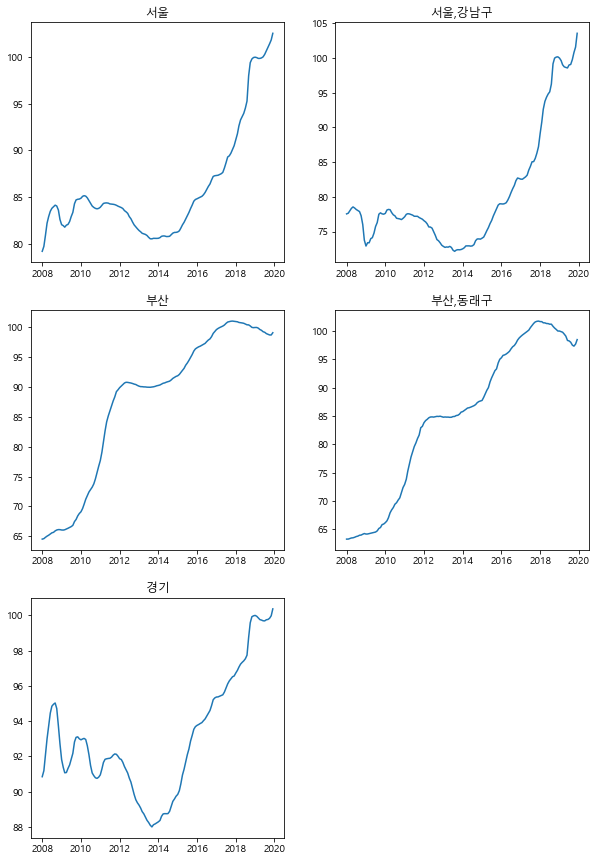

In [40]:
# 데이터 시각화

#1. Plot
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

path= r'C:\Users\ewsn9\Desktop\부동산데이터\★(월간)KB주택가격동향_시계열(2019.12)(2003버전).xls'
data_type='매매종합'
#new_col_data['전국']['전국']['2008-01':].plot(legend='전국')

#2. Subplot
#plt.figure(figsize=(10,5))
#plt.subplot(1,2,1)
#plt.title('서울')
#plt.plot(new_col_data['서울']['서울']['2008-1':])
#plt.subplot(1,2,2)
#plt.title('부산')
#plt.plot(new_col_data['부산']['부산']['2008-1':])

#3. Subplot
spots='전국 서울 부산 대구'
start_date='2008-1'
spot_list=spots.split(' ')
num_row=int((len(spot_list)-1)/2)+1
#plt.figure(figsize=(10,num_row*5))
#for i, spot in enumerate(spot_list):
    #plt.subplot(num_row,2,i+1)
    #plt.title(spot)
    #plt.plot(new_col_data[spot][spot][start_date:])
    
#4. Subplot
spots='서울 서울,강남구 부산 부산,동래구 경기'
spot_list=spots.split(' ')
num_row=int((len(spot_list)-1)/2)+1
plt.figure(figsize=(10,num_row*5))
for i,spot in enumerate(spot_list):
    plt.subplot(num_row,2,i+1)
    plt.title(spot)
    if ',' in spot:
        si,gu=spot.split(',')
    else:
        si=gu=spot
    plt.plot(new_col_data[si][gu][start_date:])



In [25]:
# 월간 아파트 매매가격지수(2022년 버전)
path= r'C:\Users\ewsn9\Desktop\부동산데이터\월간 아파트 매매가격지수_20221127.xlsx'
wb=xw.Book(path)
sheet=wb.sheets['월간 아파트 매매가격지수_20221127']
row_num=sheet.range(1,1).end('down').row
data_range='A1:BJ'+str(row_num)
raw_data=sheet[data_range].options(pd.DataFrame,index=True,header=True).value
raw_data=raw_data.T

In [26]:
raw_data

지역명,전국,서울,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,함안군,창녕군,고성군,남해군,하동군,산청군,함양군,거창군,합천군,제주
2017-10-01 09:00:52,73.472,64.05,75.755,70.975,66.061,66.197,66.246,66.314,68.188,64.387,...,-,-,-,-,-,-,-,-,-,82.905
2017-11-01 09:00:52,73.568,64.447,75.965,71.295,66.408,66.944,67.167,66.569,68.405,64.684,...,-,-,-,-,-,-,-,-,-,82.781
2017-12-01 09:00:52,73.657,64.873,76.32,71.498,66.758,67.784,67.837,66.785,68.58,64.915,...,-,-,-,-,-,-,-,-,-,82.756
2018-01-01 09:00:52,73.81,65.602,76.823,71.795,67.524,69.192,68.903,67.279,68.917,65.373,...,-,-,-,-,-,-,-,-,-,82.629
2018-02-01 09:00:52,73.961,66.249,77.001,72.262,68.343,70.532,69.942,67.889,69.25,65.582,...,-,-,-,-,-,-,-,-,-,82.629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01 09:00:52,100.752,100.603,101.313,100.237,102.413,100.649,101.308,100.124,100.283,99.729,...,102.293,101.538,103.659,101.831,101.719,104.683,102.466,102.117,110.36,104.974
2022-07-01 09:00:52,100.678,100.638,101.438,100.309,102.62,100.668,101.507,99.896,100.335,99.6,...,103.251,101.549,103.551,101.831,101.719,104.683,102.815,103.148,110.712,105.105
2022-08-01 09:00:52,100.45,100.492,101.411,100.236,102.668,100.73,101.574,99.843,100.335,99.237,...,103.251,101.624,103.869,101.831,101.719,104.683,103.992,103.228,110.712,105.17
2022-09-01 09:00:52,100.209,100.297,101.4,100.174,102.666,100.684,101.327,99.636,100.325,99.004,...,103.625,101.722,104.144,101.831,101.62,105.1,103.992,103.669,110.712,105.253


<AxesSubplot:>

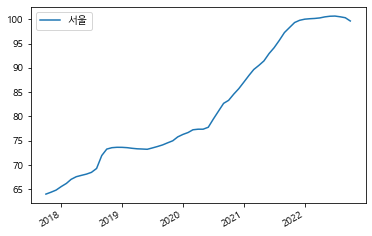

In [27]:
raw_data['서울'].plot(legend='서울')